In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

reading the csv file

In [2]:
home_sales=pd.read_csv('data/RDC_Inventory_Core_Metrics_State_History.csv',nrows=4131)

In [3]:
home_sales

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202403,Arizona,AZ,500000,-0.0066,0.0417,20444,0.1001,0.2094,50,...,845509,-0.0094,0.0974,34042,0.1882,0.2043,0.6518,0.0996,-0.0191,0
1,202403,District of Columbia,DC,615000,0.0125,-0.0357,1879,0.1353,0.1987,41,...,993315,0.0161,0.0434,2695,0.1050,0.0993,0.4348,-0.0428,-0.1221,0
2,202403,Massachusetts,MA,799900,0.0288,0.0751,5701,0.0808,0.0421,31,...,1507244,0.0262,0.1144,7480,0.1023,0.0270,0.3194,0.0285,-0.0236,0
3,202403,New Mexico,NM,385000,-0.0081,0.0304,3864,0.0245,0.1562,61,...,588655,-0.0031,0.0483,6072,0.0377,0.1758,0.5738,0.0191,0.0245,0
4,202403,New York,NY,685000,0.0498,0.0925,28799,0.0278,-0.0434,58,...,1574357,0.0201,0.0636,44249,0.0517,-0.0300,0.5377,0.0278,0.0131,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4126,201707,Indiana,IN,169900,0.0000,0.1441,22868,0.0755,-0.1834,53,...,242379,-0.0069,0.1174,29432,0.0199,-0.1517,0.2904,-0.0700,0.0404,0
4127,201707,Colorado,CO,449900,0.0000,0.0737,22585,0.0875,-0.0815,43,...,831557,0.0091,0.0529,29128,0.0791,-0.0598,0.2901,-0.0128,0.0289,0
4128,201707,Wyoming,WY,248950,0.0161,0.0069,4611,0.0587,-0.0112,65,...,480837,0.0533,0.0571,5164,0.0514,-0.0056,0.1217,-0.0075,0.0078,0
4129,201707,Illinois,IL,239900,-0.0066,0.0667,55908,0.0431,-0.0850,53,...,370018,-0.0098,0.0601,82858,-0.0123,-0.0795,0.4900,-0.0705,0.0125,0


In [4]:
home_sales.columns

Index(['month_date_yyyymm', 'state', 'state_id', 'median_listing_price',
       'median_listing_price_mm', 'median_listing_price_yy',
       'active_listing_count', 'active_listing_count_mm',
       'active_listing_count_yy', 'median_days_on_market',
       'median_days_on_market_mm', 'median_days_on_market_yy',
       'new_listing_count', 'new_listing_count_mm', 'new_listing_count_yy',
       'price_increased_count', 'price_increased_count_mm',
       'price_increased_count_yy', 'price_reduced_count',
       'price_reduced_count_mm', 'price_reduced_count_yy',
       'pending_listing_count', 'pending_listing_count_mm',
       'pending_listing_count_yy', 'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_mm',
       'median_listing_price_per_square_foot_yy', 'median_square_feet',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price', 'average_listing_price_mm',
       'average_listing_price_yy', 'total_listing_count',
 

In [5]:
home_sales

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202403,Arizona,AZ,500000,-0.0066,0.0417,20444,0.1001,0.2094,50,...,845509,-0.0094,0.0974,34042,0.1882,0.2043,0.6518,0.0996,-0.0191,0
1,202403,District of Columbia,DC,615000,0.0125,-0.0357,1879,0.1353,0.1987,41,...,993315,0.0161,0.0434,2695,0.1050,0.0993,0.4348,-0.0428,-0.1221,0
2,202403,Massachusetts,MA,799900,0.0288,0.0751,5701,0.0808,0.0421,31,...,1507244,0.0262,0.1144,7480,0.1023,0.0270,0.3194,0.0285,-0.0236,0
3,202403,New Mexico,NM,385000,-0.0081,0.0304,3864,0.0245,0.1562,61,...,588655,-0.0031,0.0483,6072,0.0377,0.1758,0.5738,0.0191,0.0245,0
4,202403,New York,NY,685000,0.0498,0.0925,28799,0.0278,-0.0434,58,...,1574357,0.0201,0.0636,44249,0.0517,-0.0300,0.5377,0.0278,0.0131,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4126,201707,Indiana,IN,169900,0.0000,0.1441,22868,0.0755,-0.1834,53,...,242379,-0.0069,0.1174,29432,0.0199,-0.1517,0.2904,-0.0700,0.0404,0
4127,201707,Colorado,CO,449900,0.0000,0.0737,22585,0.0875,-0.0815,43,...,831557,0.0091,0.0529,29128,0.0791,-0.0598,0.2901,-0.0128,0.0289,0
4128,201707,Wyoming,WY,248950,0.0161,0.0069,4611,0.0587,-0.0112,65,...,480837,0.0533,0.0571,5164,0.0514,-0.0056,0.1217,-0.0075,0.0078,0
4129,201707,Illinois,IL,239900,-0.0066,0.0667,55908,0.0431,-0.0850,53,...,370018,-0.0098,0.0601,82858,-0.0123,-0.0795,0.4900,-0.0705,0.0125,0


changing the date format to datetime

In [6]:
home_sales['month_date_yyyymm']=pd.to_datetime(home_sales['month_date_yyyymm'],format='%Y%m')
home_sales

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,2024-03-01,Arizona,AZ,500000,-0.0066,0.0417,20444,0.1001,0.2094,50,...,845509,-0.0094,0.0974,34042,0.1882,0.2043,0.6518,0.0996,-0.0191,0
1,2024-03-01,District of Columbia,DC,615000,0.0125,-0.0357,1879,0.1353,0.1987,41,...,993315,0.0161,0.0434,2695,0.1050,0.0993,0.4348,-0.0428,-0.1221,0
2,2024-03-01,Massachusetts,MA,799900,0.0288,0.0751,5701,0.0808,0.0421,31,...,1507244,0.0262,0.1144,7480,0.1023,0.0270,0.3194,0.0285,-0.0236,0
3,2024-03-01,New Mexico,NM,385000,-0.0081,0.0304,3864,0.0245,0.1562,61,...,588655,-0.0031,0.0483,6072,0.0377,0.1758,0.5738,0.0191,0.0245,0
4,2024-03-01,New York,NY,685000,0.0498,0.0925,28799,0.0278,-0.0434,58,...,1574357,0.0201,0.0636,44249,0.0517,-0.0300,0.5377,0.0278,0.0131,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4126,2017-07-01,Indiana,IN,169900,0.0000,0.1441,22868,0.0755,-0.1834,53,...,242379,-0.0069,0.1174,29432,0.0199,-0.1517,0.2904,-0.0700,0.0404,0
4127,2017-07-01,Colorado,CO,449900,0.0000,0.0737,22585,0.0875,-0.0815,43,...,831557,0.0091,0.0529,29128,0.0791,-0.0598,0.2901,-0.0128,0.0289,0
4128,2017-07-01,Wyoming,WY,248950,0.0161,0.0069,4611,0.0587,-0.0112,65,...,480837,0.0533,0.0571,5164,0.0514,-0.0056,0.1217,-0.0075,0.0078,0
4129,2017-07-01,Illinois,IL,239900,-0.0066,0.0667,55908,0.0431,-0.0850,53,...,370018,-0.0098,0.0601,82858,-0.0123,-0.0795,0.4900,-0.0705,0.0125,0


In [7]:
home_sales['year']=home_sales['month_date_yyyymm'].dt.year
home_sales

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,year
0,2024-03-01,Arizona,AZ,500000,-0.0066,0.0417,20444,0.1001,0.2094,50,...,-0.0094,0.0974,34042,0.1882,0.2043,0.6518,0.0996,-0.0191,0,2024
1,2024-03-01,District of Columbia,DC,615000,0.0125,-0.0357,1879,0.1353,0.1987,41,...,0.0161,0.0434,2695,0.1050,0.0993,0.4348,-0.0428,-0.1221,0,2024
2,2024-03-01,Massachusetts,MA,799900,0.0288,0.0751,5701,0.0808,0.0421,31,...,0.0262,0.1144,7480,0.1023,0.0270,0.3194,0.0285,-0.0236,0,2024
3,2024-03-01,New Mexico,NM,385000,-0.0081,0.0304,3864,0.0245,0.1562,61,...,-0.0031,0.0483,6072,0.0377,0.1758,0.5738,0.0191,0.0245,0,2024
4,2024-03-01,New York,NY,685000,0.0498,0.0925,28799,0.0278,-0.0434,58,...,0.0201,0.0636,44249,0.0517,-0.0300,0.5377,0.0278,0.0131,0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4126,2017-07-01,Indiana,IN,169900,0.0000,0.1441,22868,0.0755,-0.1834,53,...,-0.0069,0.1174,29432,0.0199,-0.1517,0.2904,-0.0700,0.0404,0,2017
4127,2017-07-01,Colorado,CO,449900,0.0000,0.0737,22585,0.0875,-0.0815,43,...,0.0091,0.0529,29128,0.0791,-0.0598,0.2901,-0.0128,0.0289,0,2017
4128,2017-07-01,Wyoming,WY,248950,0.0161,0.0069,4611,0.0587,-0.0112,65,...,0.0533,0.0571,5164,0.0514,-0.0056,0.1217,-0.0075,0.0078,0,2017
4129,2017-07-01,Illinois,IL,239900,-0.0066,0.0667,55908,0.0431,-0.0850,53,...,-0.0098,0.0601,82858,-0.0123,-0.0795,0.4900,-0.0705,0.0125,0,2017


calcualting average median listing price by grouping state,year

In [8]:
home_sales_mean=round(home_sales['median_listing_price'].groupby([home_sales['state_id'],home_sales['year']]).mean(),2).to_frame().reset_index()

In [9]:
home_sales_mean

,state_id,year,median_listing_price
0,AK,2017,274354.17
1,AK,2018,280299.92
2,AK,2019,291260.08
3,AK,2020,300984.58
4,AK,2021,332141.67
...,...,...,...
403,WY,2020,276321.92
404,WY,2021,302566.67
405,WY,2022,403014.58
406,WY,2023,450606.25


In [10]:
TN_median_listing_price=home_sales_mean[home_sales_mean['state_id']=='TN']
TN_median_listing_price

,state_id,year,median_listing_price
336,TN,2017,249750.00
337,TN,2018,266210.42
338,TN,2019,286660.33
339,TN,2020,311783.42
340,TN,2021,338628.75
341,TN,2022,407104.67
342,TN,2023,440766.83
343,TN,2024,431992.67


TN_median_listing_price=home_sales[home_sales['state_id']=='TN']

In [11]:
#home_sales_mean

In [12]:
#home_sales['year']=home_sales['month_date_yyyymm'].dt.year

In [13]:
#home_sales

In [14]:
median_days_listing_price=home_sales.groupby(['year', 'state_id'])[['median_listing_price','median_days_on_market']].mean().reset_index()

In [15]:
median_days_listing_price

,year,state_id,median_listing_price,median_days_on_market
0,2017,AK,274354.166667,73.333333
1,2017,AL,196538.833333,82.500000
2,2017,AR,169750.000000,80.000000
3,2017,AZ,309225.000000,55.833333
4,2017,CA,529204.166667,44.833333
...,...,...,...,...
403,2024,VT,486404.333333,75.333333
404,2024,WA,620116.666667,52.666667
405,2024,WI,371525.000000,52.333333
406,2024,WV,234133.333333,69.666667


In [16]:
#home_sales_year.sort_values(by='median_listing_price',ascending=False).head(10)

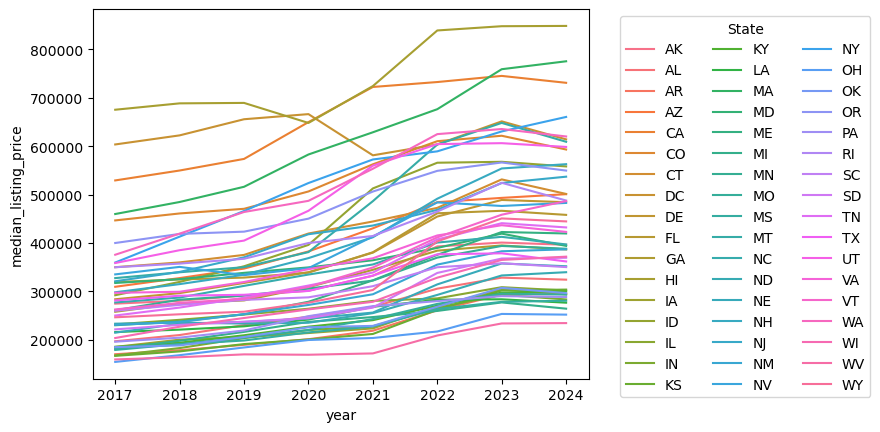

In [17]:
sns.lineplot(x=median_days_listing_price['year'],y=median_days_listing_price['median_listing_price'],hue=median_days_listing_price['state_id'])
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3);

In [18]:
TN_median_days_listing_price=median_days_listing_price[median_days_listing_price['state_id']=='TN'].reset_index(drop=True)
TN_median_days_listing_price

,year,state_id,median_listing_price,median_days_on_market
0,2017,TN,249750.000000,62.333333
1,2018,TN,266210.416667,58.416667
2,2019,TN,286660.333333,57.000000
3,2020,TN,311783.416667,49.666667
4,2021,TN,338628.750000,34.083333
5,2022,TN,407104.666667,35.666667
6,2023,TN,440766.833333,47.083333
7,2024,TN,431992.666667,55.666667


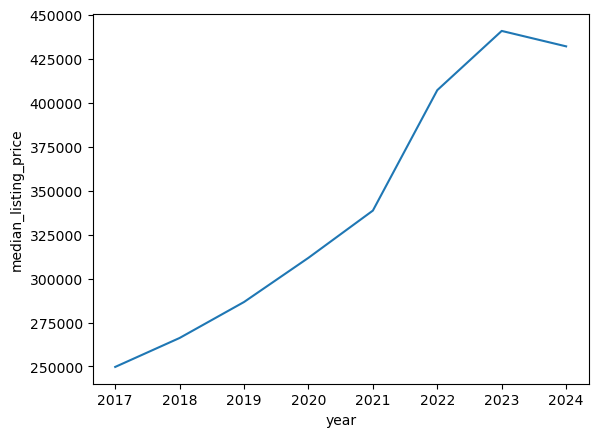

In [19]:
sns.lineplot(x=TN_median_days_listing_price['year'],y=TN_median_days_listing_price['median_listing_price']);
#plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3);

In [20]:
#home_sales_year.groupby('state_id')['median_listing_price'].mean()


In [21]:
home_sales.columns

Index(['month_date_yyyymm', 'state', 'state_id', 'median_listing_price',
       'median_listing_price_mm', 'median_listing_price_yy',
       'active_listing_count', 'active_listing_count_mm',
       'active_listing_count_yy', 'median_days_on_market',
       'median_days_on_market_mm', 'median_days_on_market_yy',
       'new_listing_count', 'new_listing_count_mm', 'new_listing_count_yy',
       'price_increased_count', 'price_increased_count_mm',
       'price_increased_count_yy', 'price_reduced_count',
       'price_reduced_count_mm', 'price_reduced_count_yy',
       'pending_listing_count', 'pending_listing_count_mm',
       'pending_listing_count_yy', 'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_mm',
       'median_listing_price_per_square_foot_yy', 'median_square_feet',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price', 'average_listing_price_mm',
       'average_listing_price_yy', 'total_listing_count',
 

In [22]:
home_df=home_sales[['month_date_yyyymm', 'state', 'state_id', 'median_listing_price',
       'active_listing_count', 'median_days_on_market',
           'new_listing_count', 
       'price_increased_count', 
       'price_reduced_count',
       'pending_listing_count', 
       'median_listing_price_per_square_foot',
       'median_square_feet',
       'average_listing_price', 
       'total_listing_count',
       'pending_ratio',
      'quality_flag', 'year']]

In [23]:
csv_file_path= 'home_sales.csv'

df.to_csv(csv_file_path, index=False)


In [24]:
home_df.to_csv(csv_file_path)

In [25]:
round(home_sales[['price_increased_count','price_reduced_count']].groupby([home_sales['state'],home_sales['year']]).mean()).reset_index()

,state,year,price_increased_count,price_reduced_count
0,Alabama,2017,485.0,4988.0
1,Alabama,2018,597.0,4908.0
2,Alabama,2019,436.0,4130.0
3,Alabama,2020,708.0,2706.0
4,Alabama,2021,652.0,1836.0
...,...,...,...,...
403,Wyoming,2020,35.0,364.0
404,Wyoming,2021,36.0,246.0
405,Wyoming,2022,18.0,349.0
406,Wyoming,2023,10.0,377.0


In [26]:
hotness=pd.read_csv('data/RDC_Inventory_Hotness_Metrics_Metro_History .csv',nrows=24000)
hotness

,month_date_yyyymm,cbsa_code,cbsa_title,nielsen_hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,...,median_dom_yy_day,median_dom_vs_us,ldp_unique_viewers_per_property_mm,ldp_unique_viewers_per_property_yy,ldp_unique_viewers_per_property_vs_us,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_vs_us,quality_flag
0,202403,31700,"Manchester-Nashua, NH",122,1,0.0,-1.0,100.000000,100.000000,100.000000,...,-9.25,-31.0,0.102765,0.062686,4.099419,549900.0,-0.038972,0.000000,1.294187,0
1,202403,40380,"Rochester, NY",49,2,0.0,0.0,98.829431,99.331104,98.327759,...,-2.00,-28.0,0.018741,-0.031800,3.215648,279900.0,0.119824,0.087413,0.658743,0
2,202403,44140,"Springfield, MA",84,3,-1.0,-5.0,98.494983,98.327759,98.662207,...,-8.25,-23.5,0.072130,0.080529,3.289446,350000.0,0.000000,0.012365,0.823723,0
3,202403,49340,"Worcester, MA-CT",58,4,1.0,-3.0,98.327759,98.996656,97.658863,...,-7.50,-27.0,0.009201,-0.053478,2.870681,499999.0,0.001300,0.014197,1.176745,0
4,202403,18180,"Concord, NH",277,5,-4.0,0.0,97.324415,95.652174,98.996656,...,-5.50,-21.0,-0.025968,-0.160130,3.414720,569950.0,0.036461,0.117659,1.341374,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,201708,15180,"Brownsville-Harlingen, TX",152,296,NaN,NaN,4.347826,0.334448,8.361204,...,-6.50,41.5,NaN,NaN,0.612154,204499.5,-0.026193,0.026346,0.743635,0
23996,201708,17980,"Columbus, GA-AL",164,297,NaN,NaN,4.180602,6.688963,1.672241,...,4.00,25.0,NaN,NaN,0.452907,155000.0,0.000000,0.007802,0.563636,0
23997,201708,34940,"Naples-Marco Island, FL",123,298,NaN,NaN,2.675585,0.000000,5.351171,...,-4.00,47.0,NaN,NaN,0.550224,469997.5,-0.010323,-0.071192,1.709082,0
23998,201708,20020,"Dothan, AL",271,299,NaN,NaN,2.341137,2.341137,2.341137,...,3.25,31.0,NaN,NaN,0.469865,159000.0,0.012739,0.060707,0.578182,0


In [27]:
hotness['month_date_yyyymm']=pd.to_datetime(hotness['month_date_yyyymm'],format='%Y%m')
hotness

,month_date_yyyymm,cbsa_code,cbsa_title,nielsen_hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,...,median_dom_yy_day,median_dom_vs_us,ldp_unique_viewers_per_property_mm,ldp_unique_viewers_per_property_yy,ldp_unique_viewers_per_property_vs_us,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_vs_us,quality_flag
0,2024-03-01,31700,"Manchester-Nashua, NH",122,1,0.0,-1.0,100.000000,100.000000,100.000000,...,-9.25,-31.0,0.102765,0.062686,4.099419,549900.0,-0.038972,0.000000,1.294187,0
1,2024-03-01,40380,"Rochester, NY",49,2,0.0,0.0,98.829431,99.331104,98.327759,...,-2.00,-28.0,0.018741,-0.031800,3.215648,279900.0,0.119824,0.087413,0.658743,0
2,2024-03-01,44140,"Springfield, MA",84,3,-1.0,-5.0,98.494983,98.327759,98.662207,...,-8.25,-23.5,0.072130,0.080529,3.289446,350000.0,0.000000,0.012365,0.823723,0
3,2024-03-01,49340,"Worcester, MA-CT",58,4,1.0,-3.0,98.327759,98.996656,97.658863,...,-7.50,-27.0,0.009201,-0.053478,2.870681,499999.0,0.001300,0.014197,1.176745,0
4,2024-03-01,18180,"Concord, NH",277,5,-4.0,0.0,97.324415,95.652174,98.996656,...,-5.50,-21.0,-0.025968,-0.160130,3.414720,569950.0,0.036461,0.117659,1.341374,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,2017-08-01,15180,"Brownsville-Harlingen, TX",152,296,NaN,NaN,4.347826,0.334448,8.361204,...,-6.50,41.5,NaN,NaN,0.612154,204499.5,-0.026193,0.026346,0.743635,0
23996,2017-08-01,17980,"Columbus, GA-AL",164,297,NaN,NaN,4.180602,6.688963,1.672241,...,4.00,25.0,NaN,NaN,0.452907,155000.0,0.000000,0.007802,0.563636,0
23997,2017-08-01,34940,"Naples-Marco Island, FL",123,298,NaN,NaN,2.675585,0.000000,5.351171,...,-4.00,47.0,NaN,NaN,0.550224,469997.5,-0.010323,-0.071192,1.709082,0
23998,2017-08-01,20020,"Dothan, AL",271,299,NaN,NaN,2.341137,2.341137,2.341137,...,3.25,31.0,NaN,NaN,0.469865,159000.0,0.012739,0.060707,0.578182,0


In [28]:
hotness['year']=hotness['month_date_yyyymm'].dt.year
hotness

,month_date_yyyymm,cbsa_code,cbsa_title,nielsen_hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,...,median_dom_vs_us,ldp_unique_viewers_per_property_mm,ldp_unique_viewers_per_property_yy,ldp_unique_viewers_per_property_vs_us,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_vs_us,quality_flag,year
0,2024-03-01,31700,"Manchester-Nashua, NH",122,1,0.0,-1.0,100.000000,100.000000,100.000000,...,-31.0,0.102765,0.062686,4.099419,549900.0,-0.038972,0.000000,1.294187,0,2024
1,2024-03-01,40380,"Rochester, NY",49,2,0.0,0.0,98.829431,99.331104,98.327759,...,-28.0,0.018741,-0.031800,3.215648,279900.0,0.119824,0.087413,0.658743,0,2024
2,2024-03-01,44140,"Springfield, MA",84,3,-1.0,-5.0,98.494983,98.327759,98.662207,...,-23.5,0.072130,0.080529,3.289446,350000.0,0.000000,0.012365,0.823723,0,2024
3,2024-03-01,49340,"Worcester, MA-CT",58,4,1.0,-3.0,98.327759,98.996656,97.658863,...,-27.0,0.009201,-0.053478,2.870681,499999.0,0.001300,0.014197,1.176745,0,2024
4,2024-03-01,18180,"Concord, NH",277,5,-4.0,0.0,97.324415,95.652174,98.996656,...,-21.0,-0.025968,-0.160130,3.414720,569950.0,0.036461,0.117659,1.341374,0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,2017-08-01,15180,"Brownsville-Harlingen, TX",152,296,NaN,NaN,4.347826,0.334448,8.361204,...,41.5,NaN,NaN,0.612154,204499.5,-0.026193,0.026346,0.743635,0,2017
23996,2017-08-01,17980,"Columbus, GA-AL",164,297,NaN,NaN,4.180602,6.688963,1.672241,...,25.0,NaN,NaN,0.452907,155000.0,0.000000,0.007802,0.563636,0,2017
23997,2017-08-01,34940,"Naples-Marco Island, FL",123,298,NaN,NaN,2.675585,0.000000,5.351171,...,47.0,NaN,NaN,0.550224,469997.5,-0.010323,-0.071192,1.709082,0,2017
23998,2017-08-01,20020,"Dothan, AL",271,299,NaN,NaN,2.341137,2.341137,2.341137,...,31.0,NaN,NaN,0.469865,159000.0,0.012739,0.060707,0.578182,0,2017


In [29]:
hotness['state_id']=hotness['cbsa_title'].str[-2:]

In [30]:
hotness

,month_date_yyyymm,cbsa_code,cbsa_title,nielsen_hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,...,ldp_unique_viewers_per_property_mm,ldp_unique_viewers_per_property_yy,ldp_unique_viewers_per_property_vs_us,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_vs_us,quality_flag,year,state_id
0,2024-03-01,31700,"Manchester-Nashua, NH",122,1,0.0,-1.0,100.000000,100.000000,100.000000,...,0.102765,0.062686,4.099419,549900.0,-0.038972,0.000000,1.294187,0,2024,NH
1,2024-03-01,40380,"Rochester, NY",49,2,0.0,0.0,98.829431,99.331104,98.327759,...,0.018741,-0.031800,3.215648,279900.0,0.119824,0.087413,0.658743,0,2024,NY
2,2024-03-01,44140,"Springfield, MA",84,3,-1.0,-5.0,98.494983,98.327759,98.662207,...,0.072130,0.080529,3.289446,350000.0,0.000000,0.012365,0.823723,0,2024,MA
3,2024-03-01,49340,"Worcester, MA-CT",58,4,1.0,-3.0,98.327759,98.996656,97.658863,...,0.009201,-0.053478,2.870681,499999.0,0.001300,0.014197,1.176745,0,2024,CT
4,2024-03-01,18180,"Concord, NH",277,5,-4.0,0.0,97.324415,95.652174,98.996656,...,-0.025968,-0.160130,3.414720,569950.0,0.036461,0.117659,1.341374,0,2024,NH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,2017-08-01,15180,"Brownsville-Harlingen, TX",152,296,NaN,NaN,4.347826,0.334448,8.361204,...,NaN,NaN,0.612154,204499.5,-0.026193,0.026346,0.743635,0,2017,TX
23996,2017-08-01,17980,"Columbus, GA-AL",164,297,NaN,NaN,4.180602,6.688963,1.672241,...,NaN,NaN,0.452907,155000.0,0.000000,0.007802,0.563636,0,2017,AL
23997,2017-08-01,34940,"Naples-Marco Island, FL",123,298,NaN,NaN,2.675585,0.000000,5.351171,...,NaN,NaN,0.550224,469997.5,-0.010323,-0.071192,1.709082,0,2017,FL
23998,2017-08-01,20020,"Dothan, AL",271,299,NaN,NaN,2.341137,2.341137,2.341137,...,NaN,NaN,0.469865,159000.0,0.012739,0.060707,0.578182,0,2017,AL


In [31]:
sales_hotness= pd.merge(home_sales, hotness, on=['state_id','year'], how='inner')
sales_hotness

,month_date_yyyymm_x,state,state_id,median_listing_price_x,median_listing_price_mm_x,median_listing_price_yy_x,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market_x,...,median_dom_yy_day,median_dom_vs_us,ldp_unique_viewers_per_property_mm,ldp_unique_viewers_per_property_yy,ldp_unique_viewers_per_property_vs_us,median_listing_price_y,median_listing_price_mm_y,median_listing_price_yy_y,median_listing_price_vs_us,quality_flag_y
0,2024-03-01,Arizona,AZ,500000,-0.0066,0.0417,20444,0.1001,0.2094,50,...,2.00,-5.00,-0.012851,-0.242621,0.976093,339000.0,0.004668,0.132927,0.797835,0
1,2024-03-01,Arizona,AZ,500000,-0.0066,0.0417,20444,0.1001,0.2094,50,...,-2.75,-6.00,-0.063807,-0.258823,0.812630,402700.0,0.006750,0.006876,0.947752,0
2,2024-03-01,Arizona,AZ,500000,-0.0066,0.0417,20444,0.1001,0.2094,50,...,-1.00,-1.00,-0.131565,-0.208537,0.728915,534990.0,-0.009269,0.071346,1.259096,0
3,2024-03-01,Arizona,AZ,500000,-0.0066,0.0417,20444,0.1001,0.2094,50,...,-5.50,10.00,-0.088736,-0.231905,1.016425,667000.0,0.030753,0.031709,1.569781,0
4,2024-03-01,Arizona,AZ,500000,-0.0066,0.0417,20444,0.1001,0.2094,50,...,-11.50,7.00,-0.008798,-0.025410,0.820023,425000.0,-0.010362,0.049383,1.000235,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270895,2017-07-01,Texas,TX,285000,-0.0127,0.0197,103726,0.0479,0.0867,53,...,2.25,15.75,NaN,NaN,0.918456,237075.0,0.008830,-0.016082,0.862091,0
270896,2017-07-01,Texas,TX,285000,-0.0127,0.0197,103726,0.0479,0.0867,53,...,6.00,21.50,NaN,NaN,0.786036,179900.0,-0.000556,0.028000,0.654182,0
270897,2017-07-01,Texas,TX,285000,-0.0127,0.0197,103726,0.0479,0.0867,53,...,-11.00,15.50,NaN,NaN,0.572039,189000.0,-0.005263,0.021622,0.687273,0
270898,2017-07-01,Texas,TX,285000,-0.0127,0.0197,103726,0.0479,0.0867,53,...,-1.50,21.00,NaN,NaN,0.446072,167950.0,0.000000,0.033857,0.610727,0


In [32]:
sales_hotness_rank=sales_hotness.groupby(['state_id','year'])['hotness_rank'].mean().reset_index()
sales_hotness_rank

,state_id,year,hotness_rank
0,AK,2017,240.200000
1,AK,2018,246.166667
2,AK,2019,254.666667
3,AK,2020,225.416667
4,AK,2021,219.250000
...,...,...,...
371,WV,2020,187.333333
372,WV,2021,215.583333
373,WV,2022,186.683333
374,WV,2023,139.200000


In [33]:
#sales_hotness=pd.merge(home_sales, hotness, on=['state_id','year'], how='inner')


In [34]:
#df['hotness_rank'].groupby([df['state_id'],df['year']])

In [35]:
#home_sales_mean=round(home_sales['median_listing_price'].groupby([home_sales['state_id'],home_sales['month_date_yyyymm']]).mean(),2).to_frame().reset_index()

correlation between hotness and days days on market 

In [36]:
mortgage=pd.read_csv('data/MORTGAGE30US.csv')

In [37]:
mortgage

,DATE,MORTGAGE30US
0,2017-01-05,4.20
1,2017-01-12,4.12
2,2017-01-19,4.09
3,2017-01-26,4.19
4,2017-02-02,4.19
...,...,...
375,2024-03-14,6.74
376,2024-03-21,6.87
377,2024-03-28,6.79
378,2024-04-04,6.82


In [38]:
mortgage['DATE']=pd.to_datetime(mortgage['DATE'])

In [39]:
mortgage['year']=mortgage['DATE'].dt.year

In [40]:
mortgage

,DATE,MORTGAGE30US,year
0,2017-01-05,4.20,2017
1,2017-01-12,4.12,2017
2,2017-01-19,4.09,2017
3,2017-01-26,4.19,2017
4,2017-02-02,4.19,2017
...,...,...,...
375,2024-03-14,6.74,2024
376,2024-03-21,6.87,2024
377,2024-03-28,6.79,2024
378,2024-04-04,6.82,2024


In [41]:
mortgage

,DATE,MORTGAGE30US,year
0,2017-01-05,4.20,2017
1,2017-01-12,4.12,2017
2,2017-01-19,4.09,2017
3,2017-01-26,4.19,2017
4,2017-02-02,4.19,2017
...,...,...,...
375,2024-03-14,6.74,2024
376,2024-03-21,6.87,2024
377,2024-03-28,6.79,2024
378,2024-04-04,6.82,2024


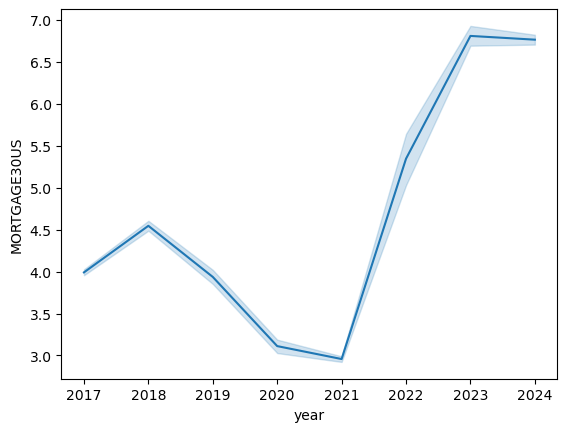

In [42]:
sns.lineplot(x=mortgage['year'],y=mortgage['MORTGAGE30US']);


# Interest rates: Low mortgage interest rates can contribute to a hot market by making homeownership more affordable and stimulating demand for homes.

In [43]:
hotness_mortgage=pd.merge(hotness,mortgage,on=['year'],how='inner')
hotness_mortgage

,month_date_yyyymm,cbsa_code,cbsa_title,nielsen_hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,...,ldp_unique_viewers_per_property_vs_us,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_vs_us,quality_flag,year,state_id,DATE,MORTGAGE30US
0,2024-03-01,31700,"Manchester-Nashua, NH",122,1,0.0,-1.0,100.00000,100.000000,100.000000,...,4.099419,549900.0,-0.038972,0.000000,1.294187,0,2024,NH,2024-01-04,6.62
1,2024-03-01,31700,"Manchester-Nashua, NH",122,1,0.0,-1.0,100.00000,100.000000,100.000000,...,4.099419,549900.0,-0.038972,0.000000,1.294187,0,2024,NH,2024-01-11,6.66
2,2024-03-01,31700,"Manchester-Nashua, NH",122,1,0.0,-1.0,100.00000,100.000000,100.000000,...,4.099419,549900.0,-0.038972,0.000000,1.294187,0,2024,NH,2024-01-18,6.60
3,2024-03-01,31700,"Manchester-Nashua, NH",122,1,0.0,-1.0,100.00000,100.000000,100.000000,...,4.099419,549900.0,-0.038972,0.000000,1.294187,0,2024,NH,2024-01-25,6.69
4,2024-03-01,31700,"Manchester-Nashua, NH",122,1,0.0,-1.0,100.00000,100.000000,100.000000,...,4.099419,549900.0,-0.038972,0.000000,1.294187,0,2024,NH,2024-02-01,6.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218295,2017-08-01,26380,"Houma-Thibodaux, LA",232,300,NaN,NaN,0.83612,0.668896,1.003344,...,0.448726,179900.0,0.000834,0.023613,0.654182,0,2017,LA,2017-11-30,3.90
1218296,2017-08-01,26380,"Houma-Thibodaux, LA",232,300,NaN,NaN,0.83612,0.668896,1.003344,...,0.448726,179900.0,0.000834,0.023613,0.654182,0,2017,LA,2017-12-07,3.94
1218297,2017-08-01,26380,"Houma-Thibodaux, LA",232,300,NaN,NaN,0.83612,0.668896,1.003344,...,0.448726,179900.0,0.000834,0.023613,0.654182,0,2017,LA,2017-12-14,3.93
1218298,2017-08-01,26380,"Houma-Thibodaux, LA",232,300,NaN,NaN,0.83612,0.668896,1.003344,...,0.448726,179900.0,0.000834,0.023613,0.654182,0,2017,LA,2017-12-21,3.94


In [44]:
#hotness_mortgage.columns

In [45]:
#hotness_mortgage[['state_id','year','hotness_rank','hotness_score','median_listing_price','median_days_on_market','MORTGAGE30US']]

In [46]:
hotness_mortgage[['hotness_score','median_days_on_market','median_listing_price']].corr()

,hotness_score,median_days_on_market,median_listing_price
hotness_score,1.000000,-0.561998,0.083785
median_days_on_market,-0.561998,1.000000,-0.237753
median_listing_price,0.083785,-0.237753,1.000000


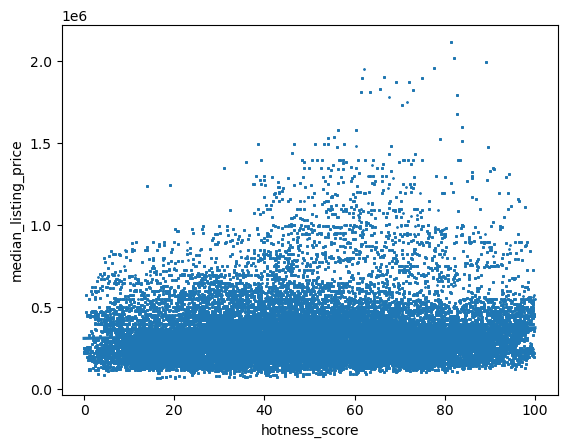

In [57]:
sns.regplot(x='hotness_score', y='median_listing_price', data=hotness_mortgage,scatter_kws={'s':0.25,'alpha':0.3});

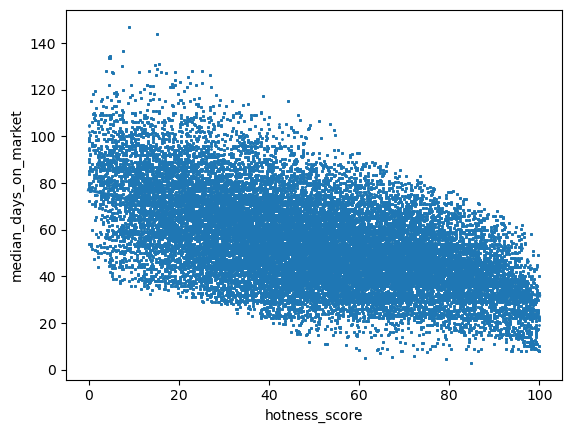

In [56]:
sns.regplot(x='hotness_score',y='median_days_on_market',data=hotness_mortgage,scatter_kws={'s':0.25,'alpha':0.3});

In [49]:
hotness_mortgage[['hotness_score','MORTGAGE30US']].corr()

,hotness_score,MORTGAGE30US
hotness_score,1.000000,-0.001344
MORTGAGE30US,-0.001344,1.000000


In [59]:
TN_hotness_mortgage=hotness_mortage[hotness_mortage['state_id']=='TN'].reset_index(drop=True)
TN_hotness_mortgage

NameError: name 'hotness_mortage' is not defined

In [ ]:
TN_hotness_mortgage[['hotness_score','median_days_on_market','median_listing_price']].corr()